In [38]:
# %pip install pandas
# %pip install SQLAlchemy
# %pip install pymysql
# %pip install pm4py

In [39]:
from sqlalchemy import create_engine
import pandas as pd
import os
import pm4py
# read mysql env v

In [40]:
mysql_user = os.environ['MYSQL_USER']
mysql_password = os.environ['MYSQL_PASSWORD']
mysql_host = os.environ['MYSQL_HOST']
mysql_db = os.environ['MYSQL_DB']


print(mysql_user, mysql_password, mysql_host, mysql_db)

# create connection string
db_connection_str = f'mysql+pymysql://{mysql_user}:{mysql_password}@{mysql_host}/{mysql_db}'
db_connection = create_engine(db_connection_str)

df = pd.read_sql('SELECT * FROM LAS2PEERMON.MESSAGE WHERE CASE_ID IS NOT NULL', con=db_connection)
df.head()

root password 137.226.232.75:30057 LAS2PEERMON


,ID,EVENT,TIME_STAMP,SOURCE_NODE,SOURCE_AGENT,DESTINATION_NODE,DESTINATION_AGENT,REMARKS,CASE_ID,ACTIVITY_NAME,RESOURCE,RESOURCE_TYPE,LIFECYCLE_PHASE,TIME_OF_EVENT
0,508,SERVICE_CUSTOM_MESSAGE_1,2023-07-22 22:37:43,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",dc3b3904-f424-4b31-a68e-e75692b804ff,menu,MensaBot,bot,start,2023-07-22 22:37:43
1,509,SERVICE_CUSTOM_MESSAGE_1,2023-07-22 22:37:43,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",dc3b3904-f424-4b31-a68e-e75692b804ff,menu,MensaBot,bot,complete,2023-07-22 22:37:43
2,510,SERVICE_CUSTOM_MESSAGE_2,2023-07-22 22:37:43,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,"{""msg"": """"}",dc3b3904-f424-4b31-a68e-e75692b804ff,menu:response,MensaBot,bot,start,2023-07-22 22:37:43
3,511,SERVICE_CUSTOM_MESSAGE_2,2023-07-22 22:37:43,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,"{""msg"": """"}",dc3b3904-f424-4b31-a68e-e75692b804ff,menu:response,MensaBot,bot,complete,2023-07-22 22:37:43
4,519,SERVICE_CUSTOM_MESSAGE_3,2023-07-22 22:37:45,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,{},dc3b3904-f424-4b31-a68e-e75692b804ff,/menu,30cf354ac74f0ccc2dfc036da409c182515665387a1ed3...,bot,start,2023-07-22 22:37:45


In [41]:
# rename columns CASE_ID->case:concept:name, ACTIVITY_NAME->concept:name, TIME_OF_EVENT->time:timestamp, LIFECYCLE_PHASE->lifecycle:transition
df.rename(columns={'CASE_ID': 'case:concept:name', 'ACTIVITY_NAME': 'concept:name', 'TIME_OF_EVENT': 'time:timestamp', 'LIFECYCLE_PHASE': 'lifecycle:transition'}, inplace=True)
# only keep events with lifecycle:transition=complete except if the EVENT is SERVICE_CUSTOM_MESSAGE_3
df = df[(df['lifecycle:transition'] == 'complete') | (df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_3')]
# append the lifecycle:transition to the concept:name for SERVICE_CUSTOM_MESSAGE_3
df.loc[df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_3', 'concept:name'] = df['concept:name'] + ' ' + df['lifecycle:transition']
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])

user_log = df[df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_1']
user_log_with_service_request = df[(df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_3') | (df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_1')]
bot_log = df[df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_2']
bot_log_with_service_response = df[(df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_3') | (df['EVENT'] == 'SERVICE_CUSTOM_MESSAGE_2')]

df.head()


,ID,EVENT,TIME_STAMP,SOURCE_NODE,SOURCE_AGENT,DESTINATION_NODE,DESTINATION_AGENT,REMARKS,case:concept:name,concept:name,RESOURCE,RESOURCE_TYPE,lifecycle:transition,time:timestamp
1,509,SERVICE_CUSTOM_MESSAGE_1,2023-07-22 22:37:43,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",dc3b3904-f424-4b31-a68e-e75692b804ff,menu,MensaBot,bot,complete,2023-07-22 22:37:43
3,511,SERVICE_CUSTOM_MESSAGE_2,2023-07-22 22:37:43,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,"{""msg"": """"}",dc3b3904-f424-4b31-a68e-e75692b804ff,menu:response,MensaBot,bot,complete,2023-07-22 22:37:43
4,519,SERVICE_CUSTOM_MESSAGE_3,2023-07-22 22:37:45,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,{},dc3b3904-f424-4b31-a68e-e75692b804ff,/menu start,30cf354ac74f0ccc2dfc036da409c182515665387a1ed3...,bot,start,2023-07-22 22:37:45
5,522,SERVICE_CUSTOM_MESSAGE_3,2023-07-22 22:37:48,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,{},dc3b3904-f424-4b31-a68e-e75692b804ff,/menu complete,30cf354ac74f0ccc2dfc036da409c182515665387a1ed3...,bot,complete,2023-07-22 22:37:48
7,528,SERVICE_CUSTOM_MESSAGE_1,2023-07-22 22:38:03,<0xB56252..>,204c85eed96a2137065641c64d6d9a3c,,,"{""msg"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f40...",1592ea03-4f1d-4d2d-863b-e3906488158e,greeting,MensaBot,bot,complete,2023-07-22 22:38:03


In [42]:

# to event log
pm4py.write_xes(df, 'test', case_id_key='case:concept:name')


exporting log, completed traces :: 100%|██████████| 8/8 [00:00<00:00, 4950.49it/s]


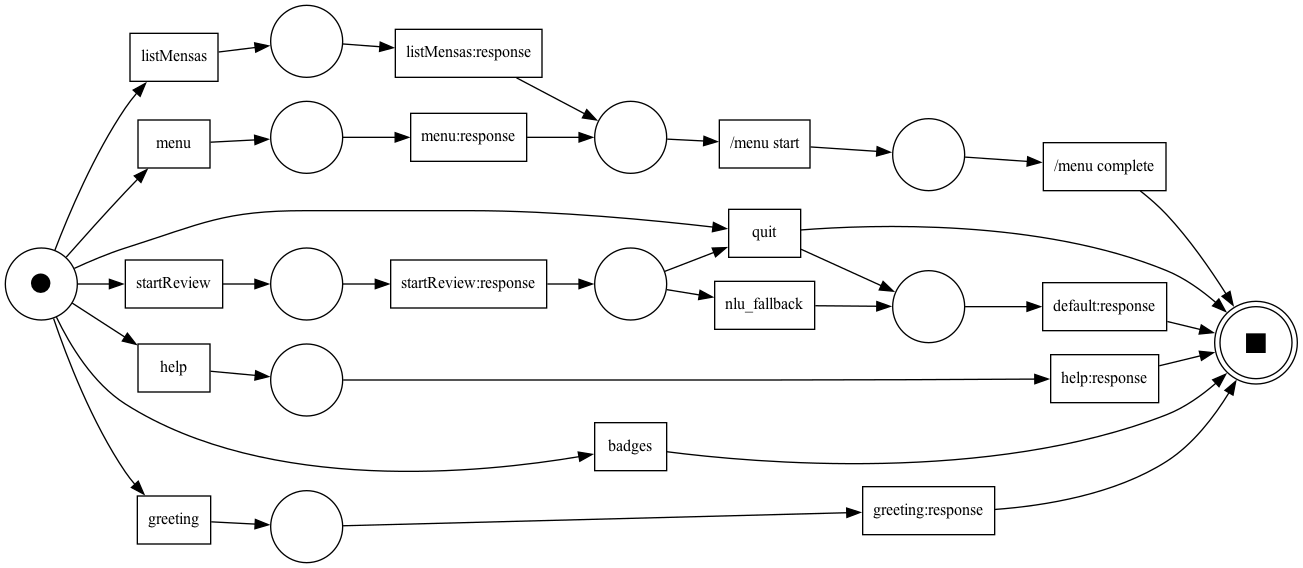

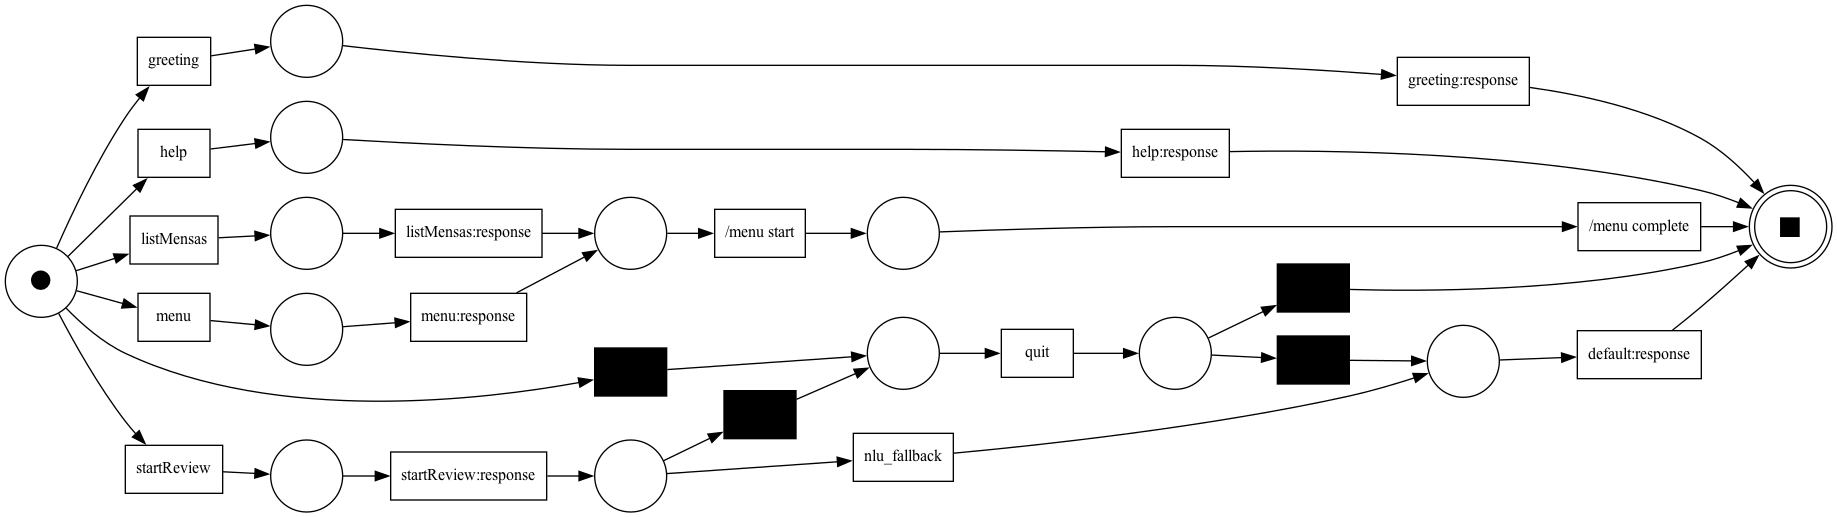

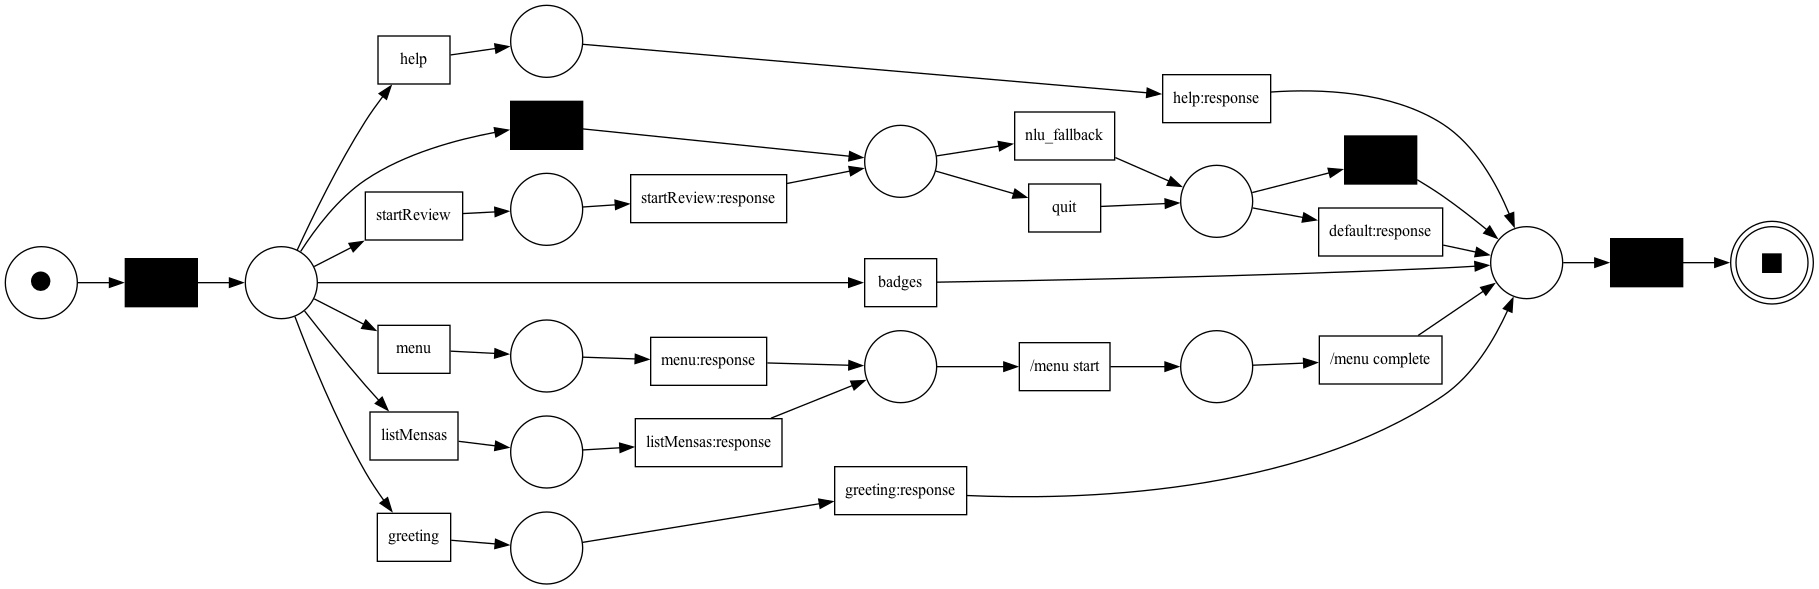

{('startReview',
  'startReview:response',
  'nlu_fallback',
  'default:response'): 1,
 ('greeting', 'greeting:response'): 1,
 ('badges',): 1,
 ('quit',): 1,
 ('help', 'help:response'): 1,
 ('listMensas', 'listMensas:response', '/menu start', '/menu complete'): 1,
 ('startReview', 'startReview:response', 'quit', 'default:response'): 1,
 ('menu', 'menu:response', '/menu start', '/menu complete'): 1}

In [43]:
# learn a bpmn model
petri_net_alpha, initial_marking_alpha, final_marking_alpha = pm4py.discovery.discover_petri_net_alpha(df)
petri_net_heuristics, initial_marking_heuristics, final_marking_heuristics = pm4py.discovery.discover_petri_net_heuristics(df)
petri_net_inductive, initial_marking_inductive, final_marking_inductive = pm4py.discovery.discover_petri_net_inductive(df, noise_threshold=0.2)

# visualize
pm4py.view_petri_net(petri_net_alpha, initial_marking_alpha, final_marking_alpha)
pm4py.view_petri_net(petri_net_heuristics, initial_marking_heuristics, final_marking_heuristics)
pm4py.view_petri_net(petri_net_inductive, initial_marking_inductive, final_marking_inductive)

variants = pm4py.get_variants(df)   
variants

## Process from the Users perspective

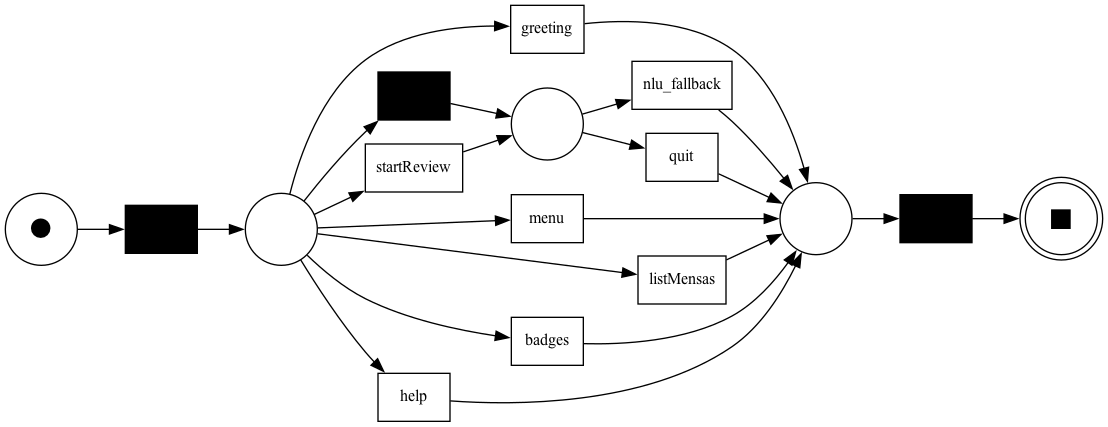

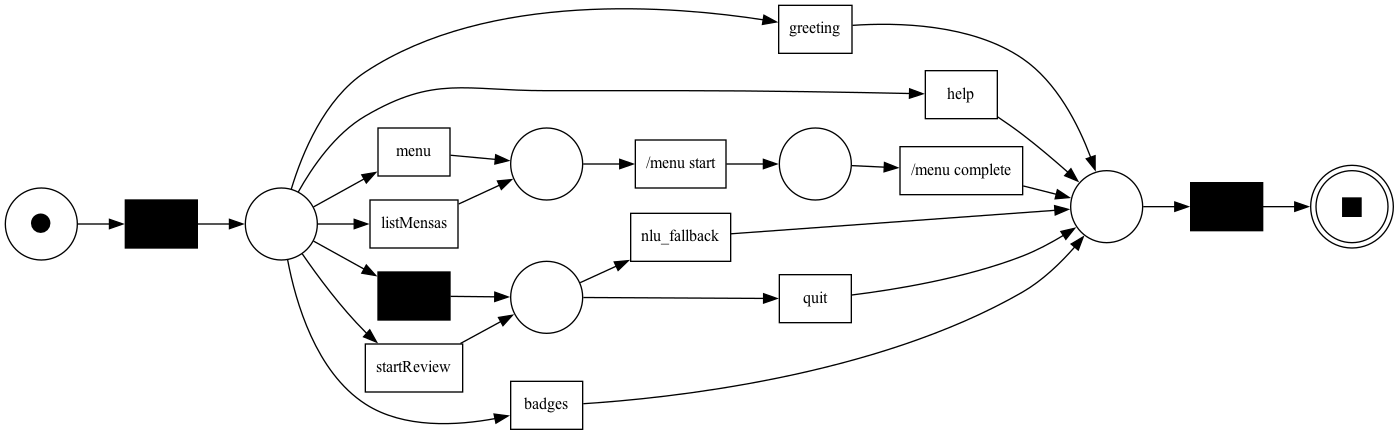

In [47]:
user_net, initial_marking_user, final_marking_user = pm4py.discovery.discover_petri_net_inductive(user_log)
pm4py.view_petri_net(user_net, initial_marking_user, final_marking_user)

user_service_net, initial_marking_user_service, final_marking_user_service = pm4py.discovery.discover_petri_net_inductive(user_log_with_service_request)
pm4py.view_petri_net(user_service_net, initial_marking_user_service, final_marking_user_service)

## Process from the Bots perspective

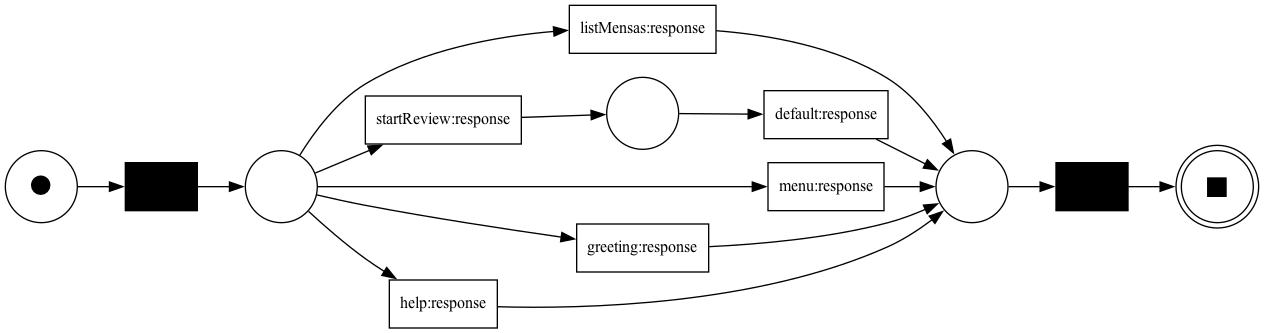

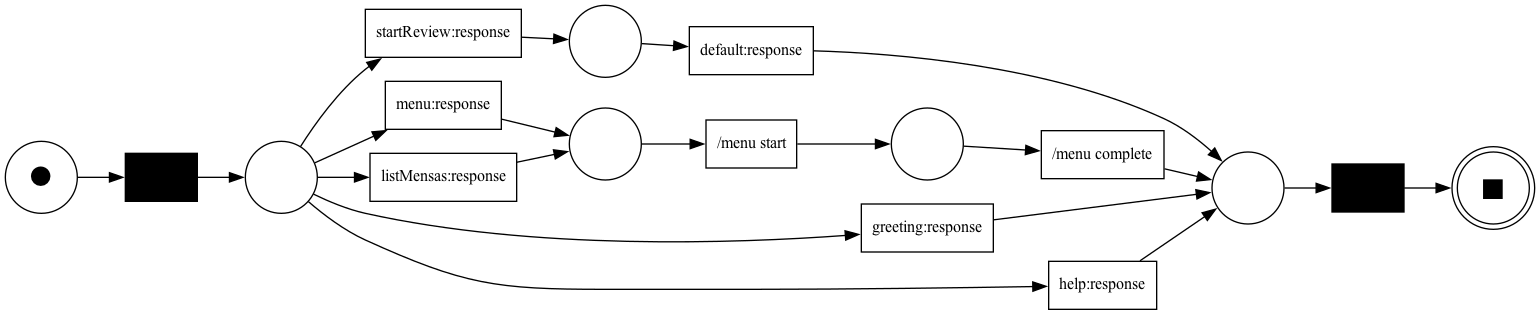

In [48]:
bot_net, initial_marking_bot, final_marking_bot = pm4py.discovery.discover_petri_net_inductive(bot_log)
pm4py.view_petri_net(bot_net, initial_marking_bot, final_marking_bot)

bot_service_net, initial_marking_bot_service, final_marking_bot_service = pm4py.discovery.discover_petri_net_inductive(bot_log_with_service_response)
pm4py.view_petri_net(bot_service_net, initial_marking_bot_service, final_marking_bot_service)